## <div align="center"> TUGAS LAB IF540 MACHINE LEARNING </div>
### <div align="center"> WEEK 12 : Reinforcement Learning </div>

#### <div align="center"> Semester Genap 2022/2023 </div>

In [1]:
import datetime
import uuid

myName = "Rendy Wirawan Tamrin"
myNIM = "00000053580"

In [2]:
myDate = datetime.datetime.now()
myDevice = str(uuid.uuid1())

print("Name: \t\t{}".format(myName))
print("NIM: \t\t{}".format(myNIM))
print("Start: \t\t{}".format(myDate))
print("Device ID: \t{}".format(myDevice))

Name: 		Rendy Wirawan Tamrin
NIM: 		00000053580
Start: 		2023-05-24 00:13:06.378752
Device ID: 	15710801-f98d-11ed-99b5-088fc3234331



---

### Dataset yang dipakai:

1. [Nama dataset1] – sumber : [cantumkan link dataset1]
2. [Nama dataset2] – sumber : [cantumkan link dataset2]

---

### Hasil kerja

#### Importing library

In [2]:
import gym
import itertools
import matplotlib
import matplotlib.style
import numpy as np
import pandas as pd
import sys

In [3]:
from collections import defaultdict
from windy_gridworld import WindyGridworldEnv
import plotting

matplotlib.style.use('ggplot')

#### Create gym environment

In [4]:
env = WindyGridworldEnv()

#### Make the greedy policy

In [5]:
def createEpsilonGreedyPolicy(Q, epsilon, num_actions):
    def policyFunction(state):
        
        Action_probabilities = np.ones(num_actions,
                dtype = float) * epsilon / num_actions
        
        best_action = np.argmax(Q[state])
        Action_probabilities[best_action] += (1.0 - epsilon)
        return Action_probabilities
    
    return policyFunction

#### Build Q-learning model

In [6]:
def qLearning(env, num_episodes, discount_factor = 1.0,
             alpha = 0.6, epsilon = 0.1):
    
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    stats = plotting.EpisodeStats(
    episode_lengths = np.zeros(num_episodes),
    episode_rewards = np.zeros(num_episodes))
    policy = createEpsilonGreedyPolicy(Q, epsilon, env.action_space.n)

    for ith_episode in range(num_episodes):
        state = env.reset()

        for t in itertools.count():
            action_probabilities = policy(state)
            action = np.random.choice(np.arange(
            len(action_probabilities)),
            p = action_probabilities)

            next_state, reward, done, _ = env.step(action)
            stats.episode_rewards[ith_episode] += reward
            stats.episode_lengths[ith_episode] = t
            
            best_next_action = np.argmax(Q[next_state])
            td_target = reward + discount_factor * Q[next_state][best_next_action]
            td_delta = td_target - Q[state][action]
            Q[state][action] += alpha * td_delta
            
            if done:
                break
            
            state = next_state
        
    return Q, stats      

#### Train the model

In [7]:
Q, stats = qLearning(env, 1000)

#### Plot important statistics

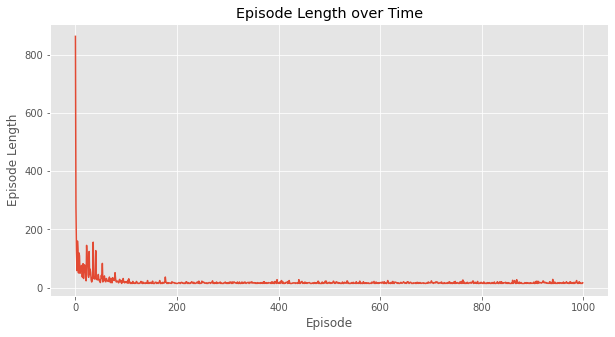

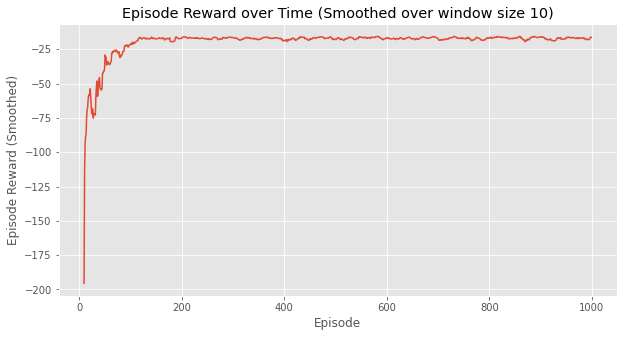

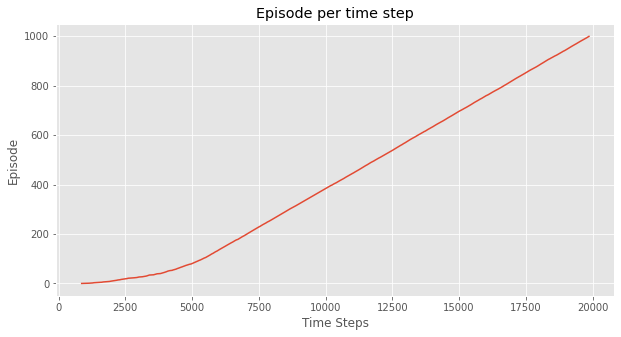

(<Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>)

In [8]:
plotting.plot_episode_stats(stats)

#### Importing the required libraries

In [9]:
import pylab as pl
import networkx as nx

#### Defining and visualizing the graph

In [10]:
edges = [(0, 1), (1, 5), (5, 6), (5, 4), (1, 2),
        (1, 3), (9, 10), (2, 4), (0, 6), (6, 7),
        (8, 9), (7, 8), (1, 7), (3, 9)]

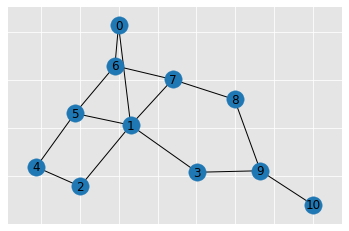

In [11]:
goal = 10
G = nx.Graph()
G.add_edges_from(edges)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)
pl.show()

#### Defining the reward the system for the bot 

In [12]:
MATRIX_SIZE = 11
M = np.matrix(np.ones(shape = (MATRIX_SIZE, MATRIX_SIZE)))
M += -1

for point in edges:
    print(point)
    if point[1] == goal:
        M[point] = 100
    else:
        M[point] = 0
    
    if point[0] == goal:
        M[point[::-1]] = 100
    else:
        M[point[::-1]] = 0
    
M[goal, goal] = 100
print(M)

(0, 1)
(1, 5)
(5, 6)
(5, 4)
(1, 2)
(1, 3)
(9, 10)
(2, 4)
(0, 6)
(6, 7)
(8, 9)
(7, 8)
(1, 7)
(3, 9)
[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 100.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 100.]]


#### Defining some utility functions to be used in the training 

In [13]:
Q = np.matrix(np.zeros([MATRIX_SIZE, MATRIX_SIZE]))

gamma = 0.75
initial_state = 1

#### Determines the available action for a given state

In [14]:
def available_actions(state):
    current_state_row = M[state, ]
    available_action = np.where(current_state_row >= 0)[1]
    return available_action

available_action = available_actions(initial_state)

#### Choose one of the available actions at random

In [15]:
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_action, 1))
    return next_action

action = sample_next_action(available_action)

#### Updating

In [16]:
def update(current_state, action, gamma):
    
    max_index = np.where(Q[action, ] == np.max(Q[action, ]))[1]
    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
    max_value = Q[action, max_index]
    Q[current_state, action] = M[current_state, action] + gamma * max_value
    if (np.max(Q) > 0):
        return(np.sum(Q / np.max(Q)*100))
    else:
        return(0)

In [17]:
update(initial_state, action, gamma)

0

#### Training and evaluating the bot using the Q-Matrix 

In [18]:
scores = []
for i in range(1000):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_action = available_actions(current_state)
    action = sample_next_action(available_action)
    score = update(current_state, action, gamma)
    scores.append(score)

Most efficient path:
[0, 9, 10]


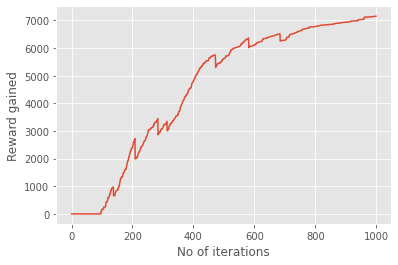

In [19]:
# Testing
current_state = 0
steps = [current_state]

while current_state != 10:
    
    next_step_index = np.where(Q[current_state, ] == np.max(Q[current_state, ]))[1]
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)
    steps.append(next_step_index)
    current_state = next_step_index
    
print("Most efficient path:")
print(steps)

pl.plot(scores)
pl.xlabel("No of iterations")
pl.ylabel("Reward gained")
pl.show()

#### Defining and visualizing the new graph with the environment clues

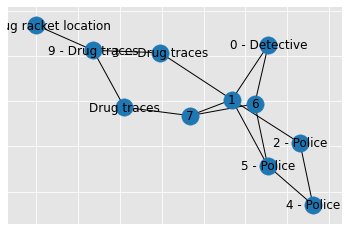

In [20]:
police = [2, 4, 5]
drug_traces = [3, 8, 9]

G = nx.Graph()
G.add_edges_from(edges)
mapping = {0:'0 - Detective', 1:'1', 2:'2 - Police', 3:'3 = Drug traces',
          4:'4 - Police', 5:'5 - Police', 6:'6', 7:'7', 8:'Drug traces',
          9:'9 - Drug traces', 10:'10 - Drug racket location'}

H = nx.relabel_nodes(G, mapping)
pos = nx.spring_layout(H)
nx.draw_networkx_nodes(H, pos)
nx.draw_networkx_edges(H, pos)
nx.draw_networkx_labels(H, pos)
pl.show()

#### Defining some utility functions for the training process

In [21]:
Q = np.matrix(np.zeros([MATRIX_SIZE, MATRIX_SIZE]))
env_police = np.matrix(np.zeros([MATRIX_SIZE, MATRIX_SIZE]))
env_drugs = np.matrix(np.zeros([MATRIX_SIZE, MATRIX_SIZE]))
initial_state = 1

In [22]:
def available_actions(state):
    current_state_row = M[state, ]
    av_action = np.where(current_state_row >= 0)[1]
    return av_action

In [23]:
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_action, 1))
    return next_action

In [24]:
def collect_environmental_data(action):
    found = []
    if action in police:
        found.append('p')
    if action in drug_traces:
        found.append('d')
    return(found)

available_action = available_actions(initial_state)
action = sample_next_action(available_action)

In [25]:
def update(current_state, action, gamma):
    max_index = np.where(Q[action, ] == np.max(Q[action, ]))[1]
    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
    max_value = Q[action, max_index]
    Q[current_state, action] = M[current_state, action] + gamma + max_value
    environment = collect_environmental_data(action)
    if 'p' in environment:
        env_police[current_state, action] += 1
    if 'd' in environment:
        env_drugs[current_state, action] += 1
    if (np.max(Q) > 0):
        return(np.sum(Q / np.max(Q)*100))
    else:
        return (0)
update(initial_state, action, gamma)

100.0

In [26]:
def available_actions_with_env_help(state):
    current_state_row = M[state, ]
    av_action = np.where(current_state_row >= 0)[1]
    
    env_pos_row = env_matrix_snap[state, av_action]
    if (np.sum(env_pos_row < 0)):
        temp_av_action = av_action[np.array(env_pos_row)[0] >= 0]
        if len(temp_av_action) > 0:
            av_action = temp_av_action
    return av_action
        

#### Visualizing the environmental metrics 

In [27]:
scores = []
for i in range(1000):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_action = available_actions(current_state)
    action = sample_next_action(available_action)
    score = update(current_state, action, gamma)

In [28]:
print('Police Found')
print(env_police)
print('')
print('Drug traces Found')
print(env_drugs)

Police Found
[[ 0.  0. 12.  0.  7. 10.  0.  0.  0.  0.  0.]
 [ 0.  0. 10.  0.  3.  8.  0.  0.  0.  0.  0.]
 [ 0.  0. 15.  0.  6.  5.  0.  0.  0.  0.  0.]
 [ 0.  0.  5.  0.  8. 10.  0.  0.  0.  0.  0.]
 [ 0.  0.  7.  0. 11.  9.  0.  0.  0.  0.  0.]
 [ 0.  0.  7.  0. 14. 10.  0.  0.  0.  0.  0.]
 [ 0.  0.  9.  0. 10.  6.  0.  0.  0.  0.  0.]
 [ 0.  0.  9.  0.  7. 15.  0.  0.  0.  0.  0.]
 [ 0.  0.  7.  0.  5. 11.  0.  0.  0.  0.  0.]
 [ 0.  0. 13.  0.  6.  9.  0.  0.  0.  0.  0.]
 [ 0.  0.  6.  0.  3.  3.  0.  0.  0.  0.  0.]]

Drug traces Found
[[ 0.  0.  0. 10.  0.  0.  0.  0. 16.  4.  0.]
 [ 0.  0.  0.  4.  0.  0.  0.  0.  7.  7.  0.]
 [ 0.  0.  0. 12.  0.  0.  0.  0. 11.  7.  0.]
 [ 0.  0.  0.  3.  0.  0.  0.  0.  4.  2.  0.]
 [ 0.  0.  0.  4.  0.  0.  0.  0.  3.  6.  0.]
 [ 0.  0.  0.  8.  0.  0.  0.  0.  6. 10.  0.]
 [ 0.  0.  0. 11.  0.  0.  0.  0. 10. 12.  0.]
 [ 0.  0.  0.  5.  0.  0.  0.  0.  8.  5.  0.]
 [ 0.  0.  0.  5.  0.  0.  0.  0.  8. 11.  0.]
 [ 0.  0.  0. 11.  0.  0.  

#### Let’s started. We can load the game environment and render what it looks like 

In [29]:
env = gym.make('CartPole-v1').env
#env.render()

#### Let’s dive more into the environment. 

In [30]:
env.reset() 
#env.render()

print('Action Space {}'.format(env.action_space))
print('State Space {}'.format(env.observation_space))

Action Space Discrete(2)
State Space Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)


In [31]:
state = 3  
print('State:', state)

env.s = state
#env.render()

State: 3


#### Building the environment

In [40]:
env = gym.make('FrozenLake8x8-v1')

#### Initializing different parameters 

In [41]:
epsilon = 0.9
total_episodes = 10000
max_steps = 100
alpha = 0.85
gamma = 0.95

Q = np.zeros((env.observation_space.n, env.action_space.n))

#### Defining utility function to be used in the learning process

In [42]:
def choose_action(state):
    action = 0
    if np.random.uniform(0, 1) < epsilon:
        action = env.action_space.sample()
    else:
        action = np.argmax(Q[state, :])
    return action

def update(state, state2, reward, action, action2):
    predict = Q[state, action]
    target = reward + gamma * Q[state2, action2]
    Q[state, action] = Q[state, action] + alpha * (target - predict)

#### Training the learning agent

In [44]:
reward = 0

for episode in range(total_episodes):
    t = 0
    state1 = env.reset()
    action1 = choose_action(state1)
    
    while t < max_steps:
        #env.render()
        state2, reward, done, info = env.step(action1)
        action2 = choose_action(state2)
        update(state1, state2, reward, action1, action2)
        state1 = state2
        action1 = action2
        t += 1
        reward += 1
        if done:
            break

In [45]:
# Evaluating the performance
print ("Performance : ", reward/total_episodes)

# Visualizing the Q-matrix
print(Q)

Performance :  0.0001
[[2.93947657e-04 3.24232067e-03 1.18079536e-03 6.45207029e-04]
 [4.75755989e-04 1.00120325e-03 7.16064171e-04 4.46304993e-04]
 [3.02791218e-03 1.37381254e-04 5.62593634e-04 3.69320957e-04]
 [1.41542425e-03 2.53401258e-03 2.44532676e-03 6.10308474e-04]
 [4.73532436e-03 1.71660676e-03 3.04852688e-03 6.05253172e-03]
 [2.32326862e-03 3.43830660e-03 2.26120232e-03 1.60729271e-02]
 [5.09145247e-03 2.55173410e-03 5.98606232e-03 8.68748830e-04]
 [5.08589667e-03 4.86252067e-03 6.38616569e-03 4.41138842e-03]
 [1.99376954e-04 6.87163719e-05 6.15925515e-04 5.09090312e-04]
 [4.24934273e-04 7.14623211e-04 7.55725516e-04 1.20478721e-03]
 [2.78659419e-04 1.09165041e-03 6.93015471e-05 1.38018792e-03]
 [1.48135192e-03 1.33775454e-03 4.09855731e-04 8.34080102e-04]
 [3.67848824e-03 2.18870147e-02 3.32133585e-03 4.91443711e-03]
 [8.08419510e-04 4.87028302e-03 5.89190027e-03 1.17540932e-03]
 [5.57603414e-03 1.02266745e-02 3.95066019e-03 4.67409750e-03]
 [1.80608585e-02 3.09831225e-03 3

---

### Kesimpulan



Berikan simpulan yang dilakukan dari hasil kerja menggunakan algoritma dan 2 dataset yang
dipilih. Simpulan bisa berkisar antara (bisa di modifikasi):

    - Simpulan perbandingan dataset
    - Hasil akurasi yang diberikan (jika ada dalam modul)
    - Hasil perbandingan akurasi antara algoritma (jika ada dalam modul)
    - Hasil pemikiran dan observasi akhir dari kerja menurut mahasiswa.

---

In [46]:
# Footer
myDate = datetime.datetime.now()
print("I certify that this is my own work.")
print("Signed by:")
print("Name: \t\t{}".format(myName))
print("NIM: \t\t{}".format(myNIM))
print("Time-stamp:\t{}".format(myDate))

I certify that this is my own work.
Signed by:
Name: 		Rendy Wirawan Tamrin
NIM: 		00000053580
Time-stamp:	2023-05-27 22:14:33.721988


***

### Save the notebook, then convert the notebook to html (by running the next code).

In [1]:
!jupyter nbconvert --to html "./IF540_KelasEL_00000053580_RendyWirawanTamrin_Week12.ipynb" --output-dir="./"

[NbConvertApp] Converting notebook ./IF540_KelasEL_00000053580_RendyWirawanTamrin_Week12.ipynb to html
[NbConvertApp] Writing 810198 bytes to IF540_KelasEL_00000053580_RendyWirawanTamrin_Week12.html
